# Python Sound

Copyright Feb 11, 2016 by Michael Lamoureux. All rights reserved

Goal
- get sampled sound in and out of the Mac computer (COMPLETED!)
- get sampled sound in and out of any computer OS that supports sound (MAYBE I DON'T CARE)
- get sampled sound in and out in real time, with options to process the sound in real time

Minor goals
- Can we launch Jupyter Notebook from an application, not a line command in Terminal?
(why? because I hate using terminal, I hate having to remember the appropriate syntax just to launch something, and in general I hate typing, and searching for a decent terminal. And I hate having to figure out what folder to navigate to in the terminal, before launching the notebook). 
- YES! COMPLETED: used Applescript.
- Can we document our attempts to get this to work, and even save the bad attempts, without messing up the good stuff? (Maybe we write code, and comment it out if it does not work. Maybe we write down when we restart the kernel.)
- MAYBE: Try using triple back quotes, to turn code to verbatim, and mark as "markdown."
- Can we run a whole notebook of code, not just cell-by-cell? 
- YES! COMPLETED: Use "Cell/Run All" menu item. 
- Can we carry these ideas over to Julia?

### Pineapple
Tried out Pineapple, which is supposed to be a Mac-native application that runs like a Julia notebook. I found it here: https://nwhitehead.github.io/pineapple/
However, it does not seem to launch -- double click and it dies. I tried both the full version and the limited version, with Python 2.7. No luck.


## Applescript
Life's too short. I wrote a simple AppleScript file and saved it as an app. I called it "JupyterNotebook." Double clicking it launches the Jupyter notebook for me. For the record, here is the AppleScipt code (which is also saved on file). 
```
tell application "Finder"
    activate
    open application file "Terminal.app" of folder "Utilities" of folder "Applications" of startup disk
end tell
```
Actually, this code isn't great. See the next paragraph.

Well, fuck it, that last code only opened the terminal. Here is some Applescript that actually launches Jupyter Notebook. The script "" is a hack to get a new terminal window, then the following line actually launches the notebook.
```
tell application "Terminal"
    do script ""
    do script "jupyter notebook"
end tell
```
I saved this as an application, using the Applescript editor (which is in the Applications/Utilities folder on the Mac). Now I just click on the icon and it launches Jupyter Notebook in a browser for me. 


## Sound output on python.
Reading around the web, I got the suggestion to use the "sounddevice" module which includes PortAudio. I insalled it by typing the following command into a terminal window
```
pip install sounddevice --user
```
Documentation for it is here: http://python-sounddevice.readthedocs.org/en/0.3.1/

Note: I accidentally first installed "soundfile" I don't know why. 

While I was at it, I also upgraded pip to version 8.0.2 using the command
```
pip install --upgrade pip
```


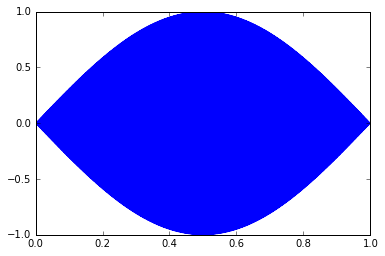

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Fs = 44100;
t = np.linspace(0,1,Fs)
x = np.sin(2*np.pi*440*t)
env = np.sin(np.pi*t)
plt.plot(t,env*x)

In [7]:
import sounddevice as sd
sd.play(env*x, Fs)

OH YEAH!  It works!

Note that I had to install "sounddevice" using pip first (in the terminal), then had to shut down the jupyter service (i.e. quit it in the terminal), then start it up again. That way, the Python code was finally able to import sounddevice, and then I was able to play the sound. Note that "x" is a simple sine wave, while "x*env" is the sine wave modulated with a smooth envelop. 

In [8]:
sd.play(env*x, Fs)

## Sound input on python.
Using the same sounddevice module, I should be able to input sound as well. 

In [32]:
duration = 2  # seconds
myrecording = sd.rec(duration * Fs, samplerate=Fs, channels=1)
# When you run this cell, you need to talk or something for the recording. 

In [10]:
np.size(myrecording)

88200

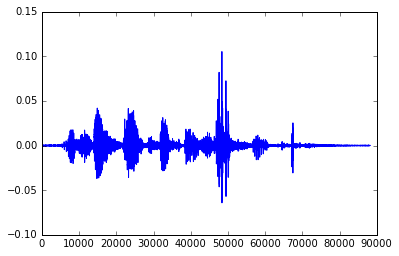

In [33]:
plt.plot(myrecording)

In [34]:
sd.play(10*myrecording, Fs)
